In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)


2.7.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 78s 175ms/step - loss: 0.5360 - accuracy: 0.7359 - val_loss: 0.4270 - val_accuracy: 0.8135
Epoch 2/10
391/391 [==============================] - 68s 175ms/step - loss: 0.3995 - accuracy: 0.8346 - val_loss: 0.5178 - val_accuracy: 0.8210
Epoch 3/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3102 - accuracy: 0.8792 - val_loss: 0.4060 - val_accuracy: 0.8249
Epoch 4/10
391/391 [==============================] - 65s 166ms/step - loss: 0.2967 - accuracy: 0.8837 - val_loss: 0.4672 - val_accuracy: 0.8178
Epoch 5/10
391/391 [==============================] - 65s 165ms/step - loss: 0.3548 - accuracy: 0.8522 - val_loss: 0.4359 - val_accuracy: 0.8376
Epoch 6/10
391/391 [==============================] - 64s 165ms/step - loss: 0.3014 - accuracy: 0.8808 - val_loss: 0.4350 - val_accuracy: 0.8341
Epoch 7/10
391/391 [==============================] - 65s 167ms/step - loss: 0.2103 - accuracy: 0.9238 - val_loss: 0.4331 - val_ac

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

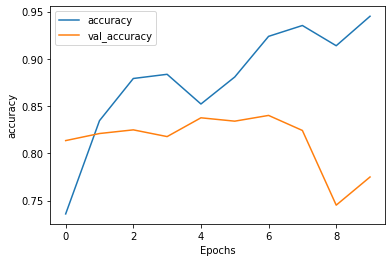

In [10]:
plot_graphs(history, 'accuracy')

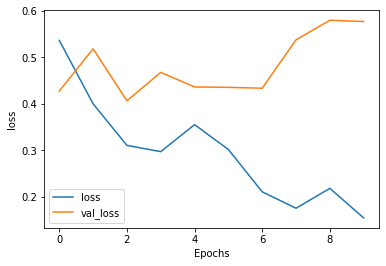

In [11]:
plot_graphs(history, 'loss')